In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
data=pd.read_csv("../input/carrington-data/parsed_data1.csv")

In [3]:
data.head()

,time_tag,density,speed,temperature,bx_gsm,by_gsm,bz_gsm,lon_gsm,lat_gsm,bt
0,2022-09-24 14:34:00.000,0.87,436.6,172003.0,-4.01,2.67,0.48,146.35,5.64,4.84
1,2022-09-24 14:35:00.000,0.94,435.7,175819.0,-4.08,2.56,0.37,147.92,4.44,4.83
2,2022-09-24 14:36:00.000,0.95,433.5,176454.0,-4.05,2.30,0.34,150.45,4.21,4.67
3,2022-09-24 14:37:00.000,0.92,430.9,185788.0,-4.26,2.13,-0.08,153.44,-0.98,4.77
4,2022-09-24 14:38:00.000,0.80,440.5,202613.0,-4.06,2.16,-0.51,151.98,-6.28,4.63


In [4]:
data.shape

(9705, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_tag     9705 non-null   object 
 1   density      9703 non-null   float64
 2   speed        9690 non-null   float64
 3   temperature  9680 non-null   float64
 4   bx_gsm       9664 non-null   float64
 5   by_gsm       9664 non-null   float64
 6   bz_gsm       9664 non-null   float64
 7   lon_gsm      9664 non-null   float64
 8   lat_gsm      9664 non-null   float64
 9   bt           9664 non-null   float64
dtypes: float64(9), object(1)
memory usage: 758.3+ KB


In [6]:
data.describe()

,density,speed,temperature,bx_gsm,by_gsm,bz_gsm,lon_gsm,lat_gsm,bt
count,9703.000000,9690.000000,9.680000e+03,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000
mean,2.378635,440.609701,1.629100e+05,-1.322252,-0.224151,0.680793,204.941340,3.725056,6.971194
std,5.322659,92.690315,1.717016e+05,4.655903,4.897265,4.480902,93.806467,26.432847,4.404392
min,0.020000,281.200000,1.008000e+04,-11.190000,-25.370000,-17.770000,0.020000,-87.600000,0.350000
25%,0.430000,370.825000,6.063675e+04,-5.090000,-2.110000,-1.080000,142.850000,-9.472500,4.650000
50%,1.010000,446.200000,1.133595e+05,-2.560000,0.320000,0.200000,172.090000,2.120000,5.520000
75%,2.460000,500.100000,1.847198e+05,3.280000,2.762500,1.560000,300.952500,19.180000,7.530000
max,78.750000,737.800000,1.503487e+06,15.140000,17.680000,30.840000,360.000000,87.090000,31.450000


<AxesSubplot:>

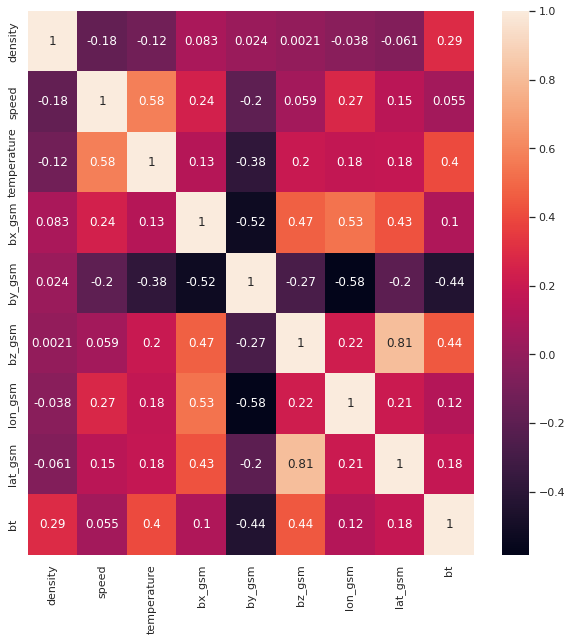

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [8]:
data.isnull().any()

time_tag       False
density         True
speed           True
temperature     True
bx_gsm          True
by_gsm          True
bz_gsm          True
lon_gsm         True
lat_gsm         True
bt              True
dtype: bool

In [9]:
data.isnull().sum()

time_tag        0
density         2
speed          15
temperature    25
bx_gsm         41
by_gsm         41
bz_gsm         41
lon_gsm        41
lat_gsm        41
bt             41
dtype: int64

In [10]:
data=data.dropna()

In [11]:
data.isna().sum()

time_tag       0
density        0
speed          0
temperature    0
bx_gsm         0
by_gsm         0
bz_gsm         0
lon_gsm        0
lat_gsm        0
bt             0
dtype: int64

In [12]:
data.shape

(9642, 10)

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


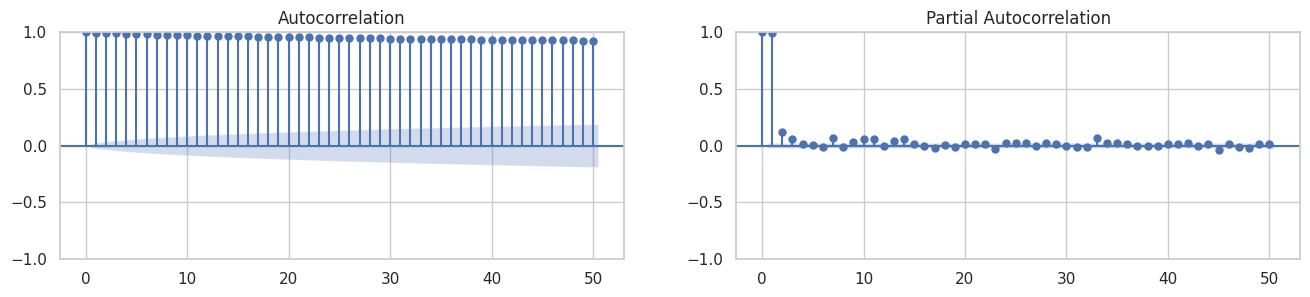

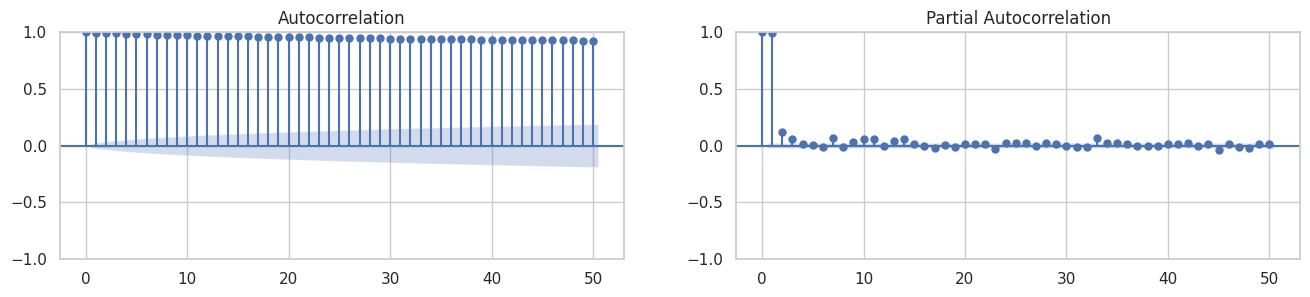

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data['bt'].tolist(), lags=50, ax=axes[0])
plot_pacf(data['bt'].tolist(), lags=50, ax=axes[1])

In [21]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='dt value', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(data, x=data['time_tag'], y=data['bt'], title='Trend and Seasonality')

KeyError: 'time_tag'

In [184]:
training_set = data.iloc[:, 1: 9].values

In [185]:
training_set.shape

(9642, 8)

In [186]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [198]:
datax=data.drop(['time_tag'], axis=1)
data_scaled = sc.fit_transform(datax)

In [203]:
data_scaled[3]

array([0.01304915, 0.32579086, 0.1176558 , 0.26319787, 0.6387921 ,
       0.36391689, 0.42619034, 0.49584979, 0.14212219])

In [187]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [188]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 
# from scipy.signal import savgol_filter
# X_train = np.abs(np.fft.fft(X_train))
# X_train = normalized = normalize(X_train)
# X_train  = savgol_filter(X_train ,21,1,deriv=0)
# std_scaler = StandardScaler()
# X_train = std_scaler.fit_transform(X_train)
# # test_X = std_scaler.fit_transform(test_X)
# # test_X = normalize(test_X)
# # test_X = np.abs(np.fft.fft(test_X))

In [189]:
X_train.shape

(9582, 60)

In [190]:
y_train.shape

(9582,)

In [192]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [193]:
X_train.shape

(9582, 60, 1)

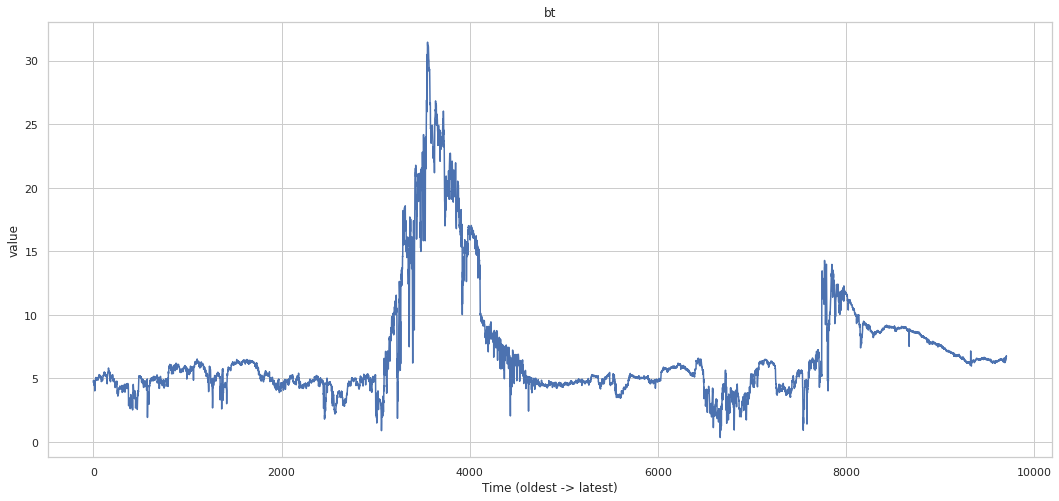

In [194]:
plt.figure(figsize=(18, 8))
plt.plot(data['bt'])
plt.title("bt")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("value")
plt.show()

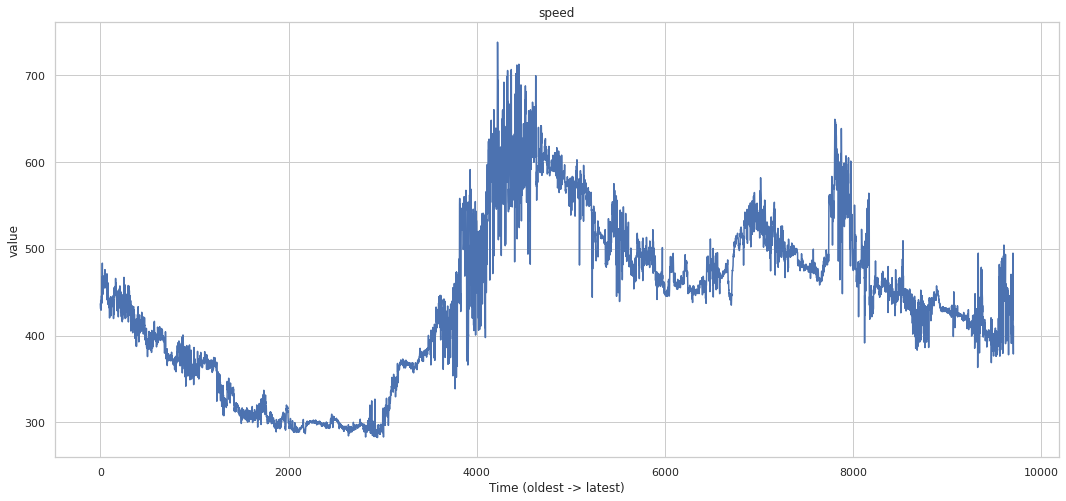

In [72]:
plt.figure(figsize=(18, 8))
plt.plot(data['speed'])
plt.title("speed")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("value")
plt.show()

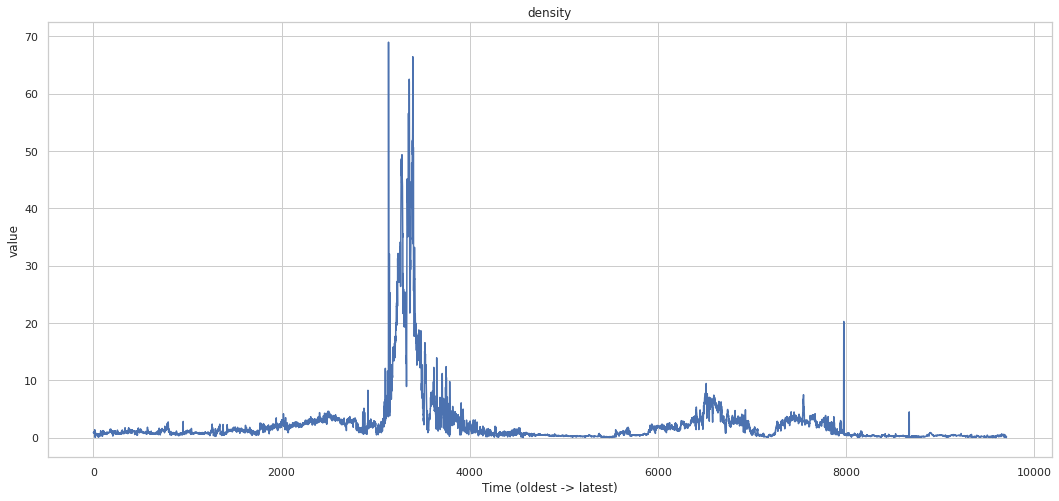

In [73]:
plt.figure(figsize=(18, 8))
plt.plot(data['density'])
plt.title("density")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("value")
plt.show()

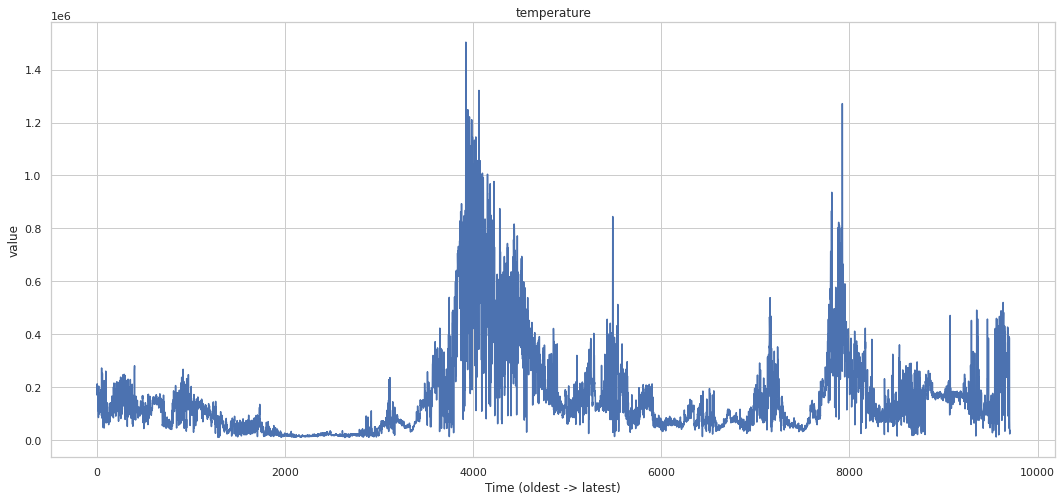

In [74]:
plt.figure(figsize=(18, 8))
plt.plot(data['temperature'])
plt.title("temperature")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("value")
plt.show()

In [75]:
model = Sequential()
#add 1st lstm layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 8)))
model.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

##add 3rd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

##add 4th lstm layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

##add output layer
model.add(Dense(units = 1))

In [78]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [80]:
history=model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 1000, validation_split=0.3)

Epoch 1/1000
210/210 [==============================] - 9s 20ms/step - loss: 0.0018 - val_loss: 1.0683e-04
Epoch 2/1000
210/210 [==============================] - 3s 16ms/step - loss: 0.0012 - val_loss: 1.0001e-04
Epoch 3/1000
210/210 [==============================] - 3s 15ms/step - loss: 0.0011 - val_loss: 1.7466e-04
Epoch 4/1000
210/210 [==============================] - 3s 15ms/step - loss: 0.0011 - val_loss: 8.6782e-05
Epoch 5/1000
210/210 [==============================] - 3s 15ms/step - loss: 9.0846e-04 - val_loss: 7.6042e-05
Epoch 6/1000
210/210 [==============================] - 4s 18ms/step - loss: 9.7199e-04 - val_loss: 7.5860e-05
Epoch 7/1000
210/210 [==============================] - 3s 15ms/step - loss: 9.5077e-04 - val_loss: 1.0600e-04
Epoch 8/1000
210/210 [==============================] - 3s 15ms/step - loss: 8.5770e-04 - val_loss: 7.4640e-05
Epoch 9/1000
210/210 [==============================] - 3s 16ms/step - loss: 8.2990e-04 - val_loss: 1.2863e-04
Epoch 10/1000
210

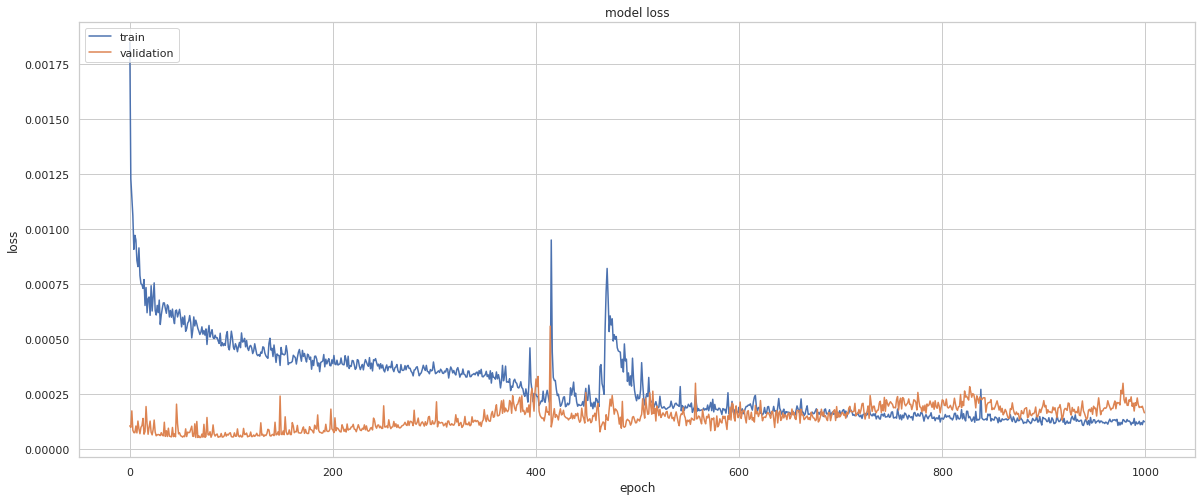

In [82]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [135]:
dataset_test=pd.read_csv("../input/carrington-data/parsed_data2.csv")

In [136]:
dataset_test.head()

,time_tag,density,speed,temperature,bx_gsm,by_gsm,bz_gsm,lon_gsm,lat_gsm,bt
0,05:00.0,2.27,485.0,151898.0,-5.42,4.15,-1.43,142.58,-11.85,6.98
1,06:00.0,2.22,482.1,165325.0,-5.43,3.40,-1.82,147.92,-15.89,6.66
2,07:00.0,2.15,481.9,175776.0,-5.34,3.30,-2.09,148.30,-18.44,6.61
3,08:00.0,2.14,482.6,172342.0,-5.54,3.39,-2.03,148.55,-17.37,6.80
4,09:00.0,2.04,481.0,166651.0,-5.42,3.80,-2.27,144.97,-18.89,7.00


In [137]:
#keras only takes numpy array
real_test = dataset_test.iloc[:, 1: 9].values
real_test.shape

(2000, 8)

In [171]:
data_test=data.drop(['bt'], axis=1)
dataset_test_x=dataset_test.drop(['bt'], axis=1)
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((data_test, dataset_test_x), axis = 0)
##use .values to make numpy array
inputs = real_test[len(data_test)-len(dataset_test_x)-60:]

In [ ]:
df-refined=

In [172]:
inputs

array([], shape=(0, 8), dtype=float64)

In [159]:
inputs.shape

(2000, 8)

In [160]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1,8)

#scale input
inputs = sc.fit_transform(inputs)

In [161]:
len(inputs)

2000

In [167]:
inputs

array([[1.11111111e-01, 4.31542461e-01, 1.10929698e-01, ...,
        4.14081733e-01, 3.55137355e-01, 4.29121540e-01],
       [1.08641975e-01, 4.21490468e-01, 1.21592411e-01, ...,
        3.94879370e-01, 3.73114732e-01, 3.96710790e-01],
       [1.05185185e-01, 4.20797227e-01, 1.29891808e-01, ...,
        3.81585426e-01, 3.74394021e-01, 3.76253510e-01],
       ...,
       [4.93827160e-04, 1.02946274e-01, 3.04435663e-02, ...,
        4.71196455e-01, 5.50733908e-01, 5.05736061e-01],
       [0.00000000e+00, 6.34315425e-02, 9.14911122e-03, ...,
        4.62333826e-01, 5.49420953e-01, 4.93622142e-01],
       [9.87654321e-03, 1.75043328e-01, 2.05471837e-02, ...,
        4.72673560e-01, 5.46323727e-01, 5.07982351e-01]])

In [162]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [163]:
X_test.shape

(1940, 60, 1)

In [164]:
predicted_bt = model.predict(X_test)

In [ ]:
from keras.models import save_model
model.save('bt_model.h5')